In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading 
## Wheat Data set!

In [2]:
df = pd.read_csv('/content/drive/MyDrive/crops_dataset/wheat.csv')

In [3]:
df

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27-06-2009,Andhra Pradesh
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13-05-2014,Andhra Pradesh
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12-05-2014,Andhra Pradesh
3,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1600.0,1550.0,10-05-2014,Andhra Pradesh
4,Cuddapah,Cuddapah,Wheat,Other,FAQ,1548.0,1610.0,1579.0,20-03-2014,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...
470542,Ajmer,Ajmer (Grain),Wheat,Other,FAQ,1250.0,2200.0,1350.0,16-06-2012,Rajasthan
470543,Ajmer,Ajmer (Grain),Wheat,Other,FAQ,1300.0,2100.0,1400.0,15-06-2012,Rajasthan
470544,Ajmer,Ajmer (Grain),Wheat,Other,FAQ,1275.0,2275.0,1325.0,14-06-2012,Rajasthan
470545,Ajmer,Ajmer (Grain),Wheat,Other,FAQ,1250.0,2300.0,1300.0,13-06-2012,Rajasthan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470547 entries, 0 to 470546
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   District Name              470547 non-null  object 
 1   Market Name                470547 non-null  object 
 2   Commodity                  470547 non-null  object 
 3   Variety                    470547 non-null  object 
 4   Grade                      470547 non-null  object 
 5   Min Price (Rs./Quintal)    470547 non-null  float64
 6   Max Price (Rs./Quintal)    470547 non-null  float64
 7   Modal Price (Rs./Quintal)  470547 non-null  float64
 8   Price Date                 470547 non-null  object 
 9   State                      470547 non-null  object 
dtypes: float64(3), object(7)
memory usage: 35.9+ MB


# Pre-processing

In [5]:
df.shape

(470547, 10)

In [6]:
rows = df.shape[0]
rows

470547

In [7]:
cols = df.shape[1]
cols

10

## Data has both numerical and categorical columns!

### >Numerical columns are: Min Price, Max Price, Modal Price.

### >Categorical Columns are: District Name,	Market Name, Commodity,	 Variety, Grade, Price Date and State.

In [8]:
df.isna().any()

District Name                False
Market Name                  False
Commodity                    False
Variety                      False
Grade                        False
Min Price (Rs./Quintal)      False
Max Price (Rs./Quintal)      False
Modal Price (Rs./Quintal)    False
Price Date                   False
State                        False
dtype: bool

## Dealing with Null Values!

In [9]:
# Number of Null values in the entire dataframe
df.isna().sum().sum()

0

In [10]:
## Checking number of null values in all the columns!

column_names = list(df.columns)
for i in range(0, len(column_names)):
  print(f"Column No: {i+1} = {column_names[i]} has {df[column_names[i]].isna().sum()} Null values!")

Column No: 1 = District Name has 0 Null values!
Column No: 2 = Market Name has 0 Null values!
Column No: 3 = Commodity has 0 Null values!
Column No: 4 = Variety has 0 Null values!
Column No: 5 = Grade has 0 Null values!
Column No: 6 = Min Price (Rs./Quintal) has 0 Null values!
Column No: 7 = Max Price (Rs./Quintal) has 0 Null values!
Column No: 8 = Modal Price (Rs./Quintal) has 0 Null values!
Column No: 9 = Price Date has 0 Null values!
Column No: 10 = State has 0 Null values!


In [11]:
## Null value indices for each column
null_maxprice = df[df['Max Price (Rs./Quintal)'].isnull()].index.tolist()
null_modalprice = df[df['Modal Price (Rs./Quintal)'].isnull()].index.tolist()
null_pricedate = df[df['Price Date'].isnull()].index.tolist()
null_state = df[df['State'].isnull()].index.tolist()

In [12]:
print(null_maxprice)
print(null_modalprice)
print(null_pricedate)
print(null_state)

[]
[]
[]
[]


## Only one row has Null Values in its columns lets remove because only one null values row is there!

## This particular row has been omitted because there was a mismatch while loading datasets. 
So this has been left like this ....

In [13]:
df.iloc[428950]

District Name                  Sangrur 
Market Name                  Ahmedgarh 
Commodity                        Wheat 
Variety                          Other 
Grade                              FAQ 
Min Price (Rs./Quintal)          1100.0
Max Price (Rs./Quintal)          1105.0
Modal Price (Rs./Quintal)        1100.0
Price Date                   26-04-2010
State                            Punjab
Name: 428950, dtype: object

In [14]:
df = df.drop(428950)

In [15]:
df.isna().sum().sum()

0

### So this data has 0 Null valued tuples!

## Lets Understand the columns of the data!

In [16]:
df.head(4)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27-06-2009,Andhra Pradesh
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13-05-2014,Andhra Pradesh
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12-05-2014,Andhra Pradesh
3,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1600.0,1550.0,10-05-2014,Andhra Pradesh


In [17]:
df_copy = pd.DataFrame(df)

In [18]:
# No of unique values in all the columns

for i in range(0, len(column_names)):
  print(f'The column {column_names[i]} has {df[column_names[i]].nunique()} unique values!')

The column District Name has 213 unique values!
The column Market Name has 973 unique values!
The column Commodity has 1 unique values!
The column Variety has 51 unique values!
The column Grade has 4 unique values!
The column Min Price (Rs./Quintal) has 2428 unique values!
The column Max Price (Rs./Quintal) has 3213 unique values!
The column Modal Price (Rs./Quintal) has 2763 unique values!
The column Price Date has 5111 unique values!
The column State has 19 unique values!


In [19]:
## Taking average min price, max price for each state
state_price = df['Modal Price (Rs./Quintal)'].groupby(df['State'])
# printing the means value
print(state_price.mean())  

State
Andhra Pradesh      1971.368421
Assam               1632.921224
Bihar               1898.051604
Chandigarh             0.000000
Chattisgarh         1485.165542
Goa                 1645.000000
Haryana             1190.562337
Himachal Pradesh    1081.457447
Jharkhand           1693.408733
Karnataka           1949.689548
Kerala              2485.732525
Maharashtra         1703.592112
Manipur             1463.000000
NCT of Delhi        1578.132199
Nagaland            1087.978723
Odisha              1713.310580
Punjab              1382.911318
Rajast              1260.000000
Rajasthan           1632.714874
Name: Modal Price (Rs./Quintal), dtype: float64


In [20]:
df[df['State']=='Chandigarh']

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
38671,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1175.0,1175.0,0.0,29-05-2010,Chandigarh
38672,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1100.0,1145.0,0.0,26-05-2010,Chandigarh
38673,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1120.0,1150.0,0.0,25-05-2010,Chandigarh
38674,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1100.0,1150.0,0.0,23-05-2010,Chandigarh
38675,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1121.0,1150.0,0.0,22-05-2010,Chandigarh
38676,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1135.0,1160.0,0.0,21-05-2010,Chandigarh
38677,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1101.0,1171.0,0.0,20-05-2010,Chandigarh
38678,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1110.0,1160.0,0.0,19-05-2010,Chandigarh
38679,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1100.0,1175.0,0.0,18-05-2010,Chandigarh
38680,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Local,FAQ,1130.0,1283.0,0.0,16-05-2010,Chandigarh


In [21]:
for i in range(38671,38671+12):
  min = df['Min Price (Rs./Quintal)'][i]
  max = df['Max Price (Rs./Quintal)'][i]
  df['Modal Price (Rs./Quintal)'][i] = (min+max)/2

<ipython-input-21-b4d8574669bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Modal Price (Rs./Quintal)'][i] = (min+max)/2


In [22]:
df[df['State']=='Chandigarh']

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
38671,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1175.0,1175.0,1175.0,29-05-2010,Chandigarh
38672,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1100.0,1145.0,1122.5,26-05-2010,Chandigarh
38673,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1120.0,1150.0,1135.0,25-05-2010,Chandigarh
38674,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1100.0,1150.0,1125.0,23-05-2010,Chandigarh
38675,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1121.0,1150.0,1135.5,22-05-2010,Chandigarh
38676,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1135.0,1160.0,1147.5,21-05-2010,Chandigarh
38677,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1101.0,1171.0,1136.0,20-05-2010,Chandigarh
38678,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1110.0,1160.0,1135.0,19-05-2010,Chandigarh
38679,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Medium,FAQ,1100.0,1175.0,1137.5,18-05-2010,Chandigarh
38680,Chandigarh,Chandigarh(Grain/Fruit),Wheat,Local,FAQ,1130.0,1283.0,1206.5,16-05-2010,Chandigarh


In [23]:
state_price = df['Modal Price (Rs./Quintal)'].groupby(df['State'])
# printing the means value
x=state_price.mean()
state_list = x.index.tolist()  # extracts the values from the index and converts it to a list
price_list = x.tolist()  # extracts the values from the 'Modal Price (Rs./Quintal)' column and converts it to a list

In [24]:
print(state_list)
print(price_list)

['Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chattisgarh', 'Goa', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala', 'Maharashtra', 'Manipur', 'NCT of Delhi', 'Nagaland', 'Odisha', 'Punjab', 'Rajast', 'Rajasthan']
[1971.3684210526317, 1632.921223709369, 1898.0516040329971, 1144.4166666666667, 1485.165541740675, 1645.0, 1190.5623365818874, 1081.4574468085107, 1693.4087331155308, 1949.6895483916946, 2485.732524736674, 1703.592112439525, 1463.0, 1578.1321986477035, 1087.9787234042553, 1713.3105799151344, 1382.9113178003256, 1260.0, 1632.7148744848257]


In [25]:
location = -1
for i in range(0, len(state_list)):
  if('Rajast' == state_list[i]):
    location = i

In [26]:
location

17

In [27]:
state_list.pop(location)
price_list.pop(location)

1260.0

## Now we will see the average prices of wheat in Each State...

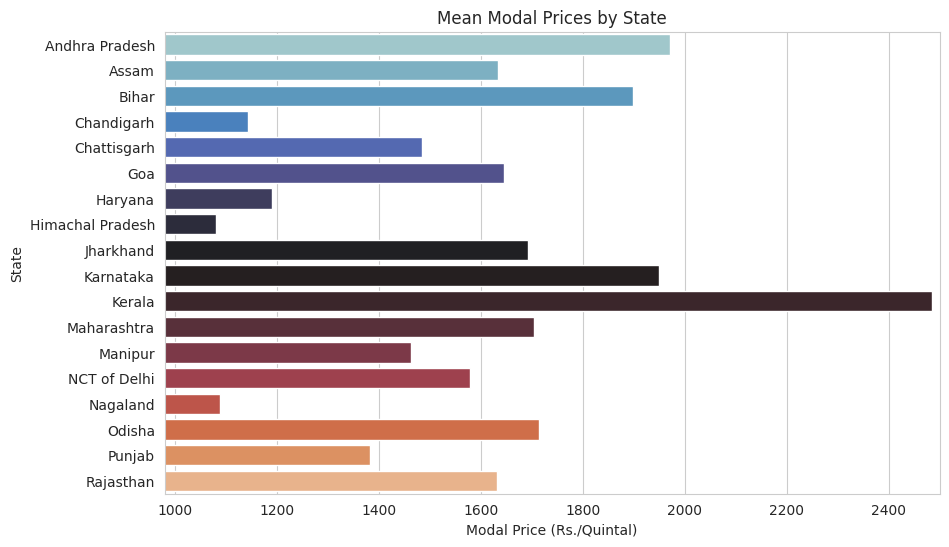

<Figure size 640x480 with 0 Axes>

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10,6))

# Create a horizontal bar plot
sns.set_style('whitegrid')
sns.barplot(x=price_list, y=state_list, palette='icefire')

# Set the plot title and axis labels
plt.title('Mean Modal Prices by State')
plt.xlabel('Modal Price (Rs./Quintal)')
plt.ylabel('State')

plt.xlim([980,2500])
# Display the plot
plt.show()

# Set the background color
plt.gcf().set_facecolor('#f0f0f0')

# Save the plot as a PNG file
plt.savefig('bar_plot.png', dpi=300, bbox_inches='tight')

In [29]:
df.head(3)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27-06-2009,Andhra Pradesh
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13-05-2014,Andhra Pradesh
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12-05-2014,Andhra Pradesh


In [30]:
df['Price Date'] = df['Price Date'].str.replace('-', '')

In [31]:
df.head(3)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27062009,Andhra Pradesh
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13052014,Andhra Pradesh
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12052014,Andhra Pradesh


In [32]:
len(df.index)

470546

In [33]:
df['Month'] = df['Price Date']
df['Year'] = df['Price Date']

In [34]:
df.head(3)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State,Month,Year
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27062009,Andhra Pradesh,27062009,27062009
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13052014,Andhra Pradesh,13052014,13052014
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12052014,Andhra Pradesh,12052014,12052014


In [35]:
len(df['Month'])

470546

In [36]:
df['Month'] = df['Price Date'].str[2:4].astype(int)
df['Year'] = df['Price Date'].str[4:].astype(int)

In [37]:
df.head(3)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State,Month,Year
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27062009,Andhra Pradesh,6,2009
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13052014,Andhra Pradesh,5,2014
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12052014,Andhra Pradesh,5,2014


In [38]:
df.shape[1]

12

In [39]:
df["Grade"].nunique()

4

In [40]:
grade = df['Modal Price (Rs./Quintal)'].groupby(df['Grade'])
# printing the means value
x=grade.mean()
grade_list = x.index.tolist()  # extracts the values from the index and converts it to a list
price_list = x.tolist()  # extracts the values from the 'Modal Price (Rs./Quintal)' column and converts it to a list

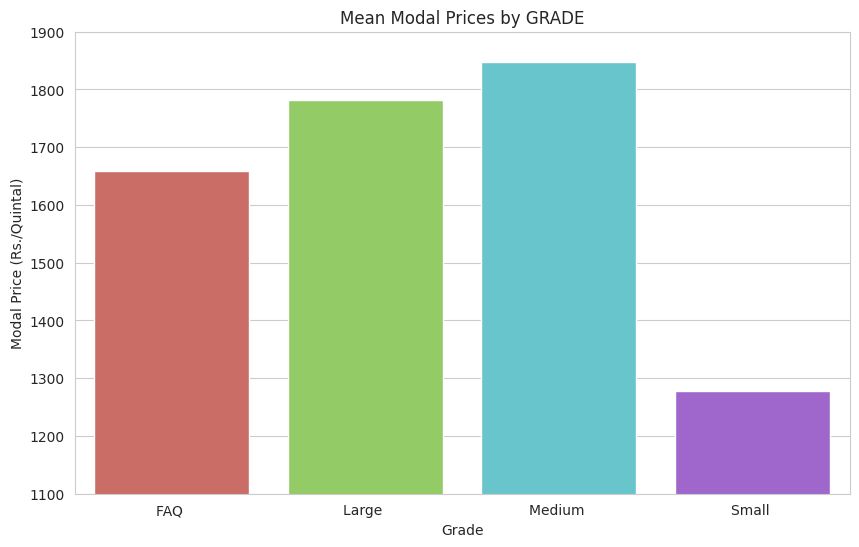

<Figure size 640x480 with 0 Axes>

In [41]:
## Now we will see the average prices of wheat in Each GRADE...
# Set the figure size
plt.figure(figsize=(10,6))


sns.set_style('whitegrid')
sns.barplot(x=grade_list, y=price_list, palette='hls')

# Set the plot title and axis labels
plt.title('Mean Modal Prices by GRADE')
plt.xlabel('Grade')
plt.ylabel('Modal Price (Rs./Quintal)')


plt.ylim([1100, 1900])
# Display the plot
plt.show()

# Set the background color
plt.gcf().set_facecolor('orange')

In [42]:
df.head(3)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State,Month,Year
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27062009,Andhra Pradesh,6,2009
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13052014,Andhra Pradesh,5,2014
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12052014,Andhra Pradesh,5,2014


In [43]:
df = df.drop('Price Date',axis=1)

In [44]:
df.head(2)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,Andhra Pradesh,6,2009
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,Andhra Pradesh,5,2014


In [45]:
df = df.drop('Commodity',axis=1)
df.head(2)

,District Name,Market Name,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,Andhra Pradesh,6,2009
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,Andhra Pradesh,5,2014


In [46]:
## Checking Variety of the Crop and its Price
df['Variety'].unique()

array(['Lok-1 ', 'Other ', 'Lokwan ', 'Farmi ', 'Dara ', 'Medium Fine ',
       '2189 No. 2 ', '147 Best ', 'Local ', 'Lok -1 (Nilami Rate) ',
       'Coarse ', 'Medium ', 'Red ', 'Deshi ', 'UP 308 ', 'PBW-154 ',
       '147 Average ', 'PBW-343 ', 'PBW-373 ', '2329', 'Sona ',
       'U.P. 301 ', 'Kalyan ', 'Sonalika ', '343', 'MP Sharbati ',
       'Bansi ', 'White ', 'Hybrid ', 'Sharbati ', 'Super Fine ',
       'Chandausi ', 'MP(Desi) ', 'Mexican ', 'WL711 ', 'Raj-3765 ',
       'Dara Mill Quality ', 'TL-1210 ', 'Kanak ', '2189 No. 1 ',
       'Lokwan MP No. 2 ', 'WH-542 ', 'H.D. ', 'Jawari ', 'Kirthi ',
       'Superior ', 'Punjab - Sona Kalyan ', 'Maharashtra 2189 ', '1482',
       'HD-2329 ', 'MP 147 '], dtype=object)

In [47]:
len(df['Variety'].unique())

51

In [48]:
## Which Variety is costly

variety = df['Modal Price (Rs./Quintal)'].groupby(df['Variety'])
# printing the means value
x=variety.mean()
variety_list = x.index.tolist()  # extracts the values from the index and converts it to a list
price_list = x.tolist()  # extracts the values from the 'Modal Price (Rs./Quintal)' column and converts it to a list

In [49]:
dictionary = dict(zip(variety_list, price_list))
print(dictionary)

{'147 Average ': 1578.4365857122568, '147 Best ': 1735.3301886792453, '1482': 1427.6733238231097, '2189 No. 1 ': 1359.1052631578948, '2189 No. 2 ': 2500.0, '2329': 1543.369266055046, '343': 1315.4896567771962, 'Bansi ': 1906.447858698282, 'Chandausi ': 1772.560975609756, 'Coarse ': 1627.3972602739725, 'Dara ': 1452.7311592217045, 'Dara Mill Quality ': 1625.0, 'Deshi ': 1682.693677547285, 'Farmi ': 1235.2690355329948, 'H.D. ': 1603.6795491143316, 'HD-2329 ': 1157.95, 'Hybrid ': 1780.4878048780488, 'Jawari ': 1893.001579778831, 'Kalyan ': 1782.7486187845304, 'Kanak ': 1402.698315467075, 'Kirthi ': 2001.6857142857143, 'Local ': 1795.34992546115, 'Lok -1 (Nilami Rate) ': 1950.0, 'Lok-1 ': 2022.1881904761906, 'Lokwan ': 1185.921568627451, 'Lokwan MP No. 2 ': 1450.0, 'MP 147 ': 1000.0, 'MP Sharbati ': 2245.495, 'MP(Desi) ': 1392.4411764705883, 'Maharashtra 2189 ': 1684.9952327983474, 'Medium ': 1999.5337172631291, 'Medium Fine ': 2437.272303206997, 'Mexican ': 1514.400772330423, 'Other ': 15

In [50]:
## Top 8 Varieties

sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))

top_keys = list(sorted_dict.keys())[:9]

print(top_keys)

['2189 No. 2 ', 'Super Fine ', 'Medium Fine ', 'Sharbati ', 'MP Sharbati ', 'PBW-373 ', 'Punjab - Sona Kalyan ', 'Sonalika ', 'Lok-1 ']


In [51]:
values = []
for i in range(0, len(top_keys)):
  value = dictionary[top_keys[i]]
  values.append(value)

In [52]:
values

[2500.0,
 2486.898774983881,
 2437.272303206997,
 2394.4605565249335,
 2245.495,
 2140.929230769231,
 2066.015228426396,
 2063.474025974026,
 2022.1881904761906]

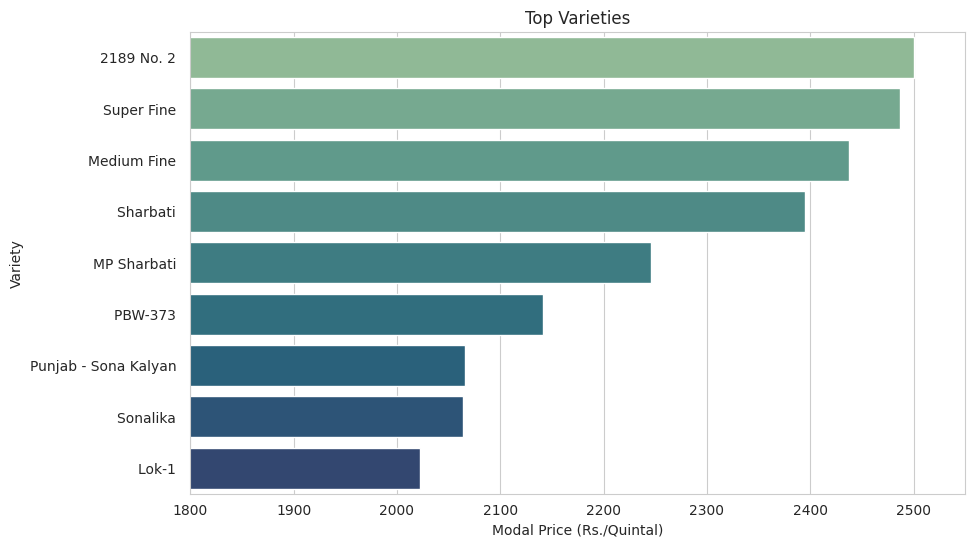

<Figure size 640x480 with 0 Axes>

In [53]:
# Set the figure size
plt.figure(figsize=(10,6))

# Create a Horizontal bar plot
sns.set_style('whitegrid')
sns.barplot(x=values, y=top_keys, palette='crest')

# Set the plot title and axis labels
plt.title('Top Varieties')
plt.xlabel('Modal Price (Rs./Quintal)')
plt.ylabel('Variety')


plt.xlim([1800, 2550])
# Display the plot
plt.show()

# Set the background color
plt.gcf().set_facecolor('maroon')


In [54]:
## Lowest Varieties(Low Price)

## Bottom 8 Varieties

sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=False))

bottom_keys = list(sorted_dict.keys())[:9]

print(bottom_keys)

['WH-542 ', 'MP 147 ', 'Raj-3765 ', 'TL-1210 ', 'HD-2329 ', 'Lokwan ', 'PBW-343 ', 'Farmi ', 'UP 308 ']


In [55]:
values = []
for i in range(0, len(bottom_keys)):
  value = dictionary[bottom_keys[i]]
  values.append(value)

In [56]:
values

[998.9655172413793,
 1000.0,
 1080.0,
 1080.0,
 1157.95,
 1185.921568627451,
 1223.56,
 1235.2690355329948,
 1277.4571428571428]

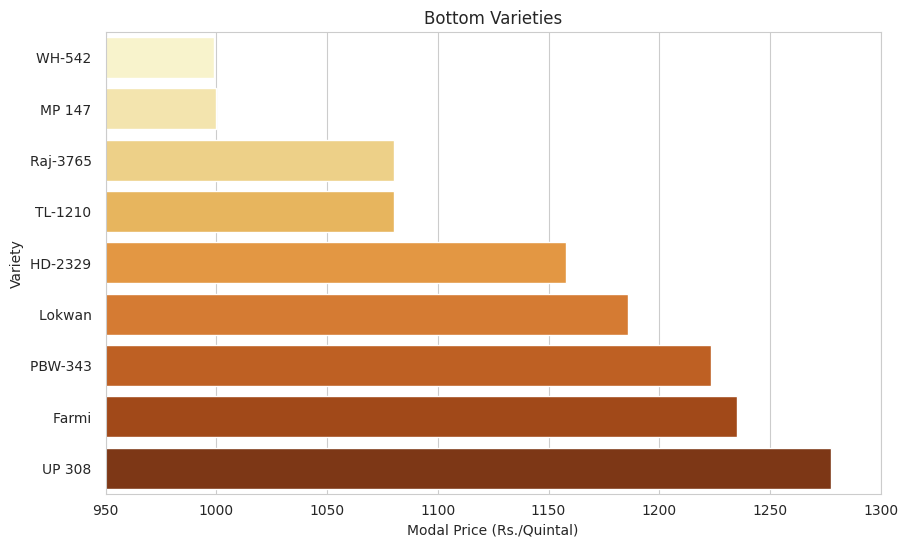

<Figure size 640x480 with 0 Axes>

In [57]:
# Set the figure size
plt.figure(figsize=(10,6))

# Create a Horizontal bar plot
sns.set_style('whitegrid')
sns.barplot(x=values, y=bottom_keys, palette='YlOrBr')

# Set the plot title and axis labels
plt.title('Bottom Varieties')
plt.xlabel('Modal Price (Rs./Quintal)')
plt.ylabel('Variety')


plt.xlim([950, 1300])
# Display the plot
plt.show()

# Set the background color
plt.gcf().set_facecolor('maroon')


In [58]:
df.head(2)

,District Name,Market Name,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,Andhra Pradesh,6,2009
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,Andhra Pradesh,5,2014


In [59]:
df['Year'].min()

2008

In [60]:
df['Year'].max()

2022

In [61]:
2022-2008


14

## 15 Years of Data

## Prices based on Years , Months 

In [62]:
## Years

years = df['Modal Price (Rs./Quintal)'].groupby(df['Year'])
# printing the means value
x=years.mean()
years_list = x.index.tolist()  # extracts the values from the index and converts it to a list
price_list = x.tolist()  # extracts the values from the 'Modal Price (Rs./Quintal)' column and converts it to a list

In [63]:
years_list

[2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [64]:
price_list

[1074.4942898076135,
 1218.1225714120503,
 1314.766650745635,
 1306.2417099286179,
 1441.7648444315207,
 1656.3512237433729,
 1702.311573271712,
 1756.5945773801202,
 1890.2997838839149,
 1837.5089532359905,
 1917.2044413386132,
 2095.725477502884,
 1948.3788628670393,
 1907.868381543389,
 2067.246735395189]

In [65]:
for i in range(0, len(price_list)):
  price_list[i] = round(price_list[i],1)

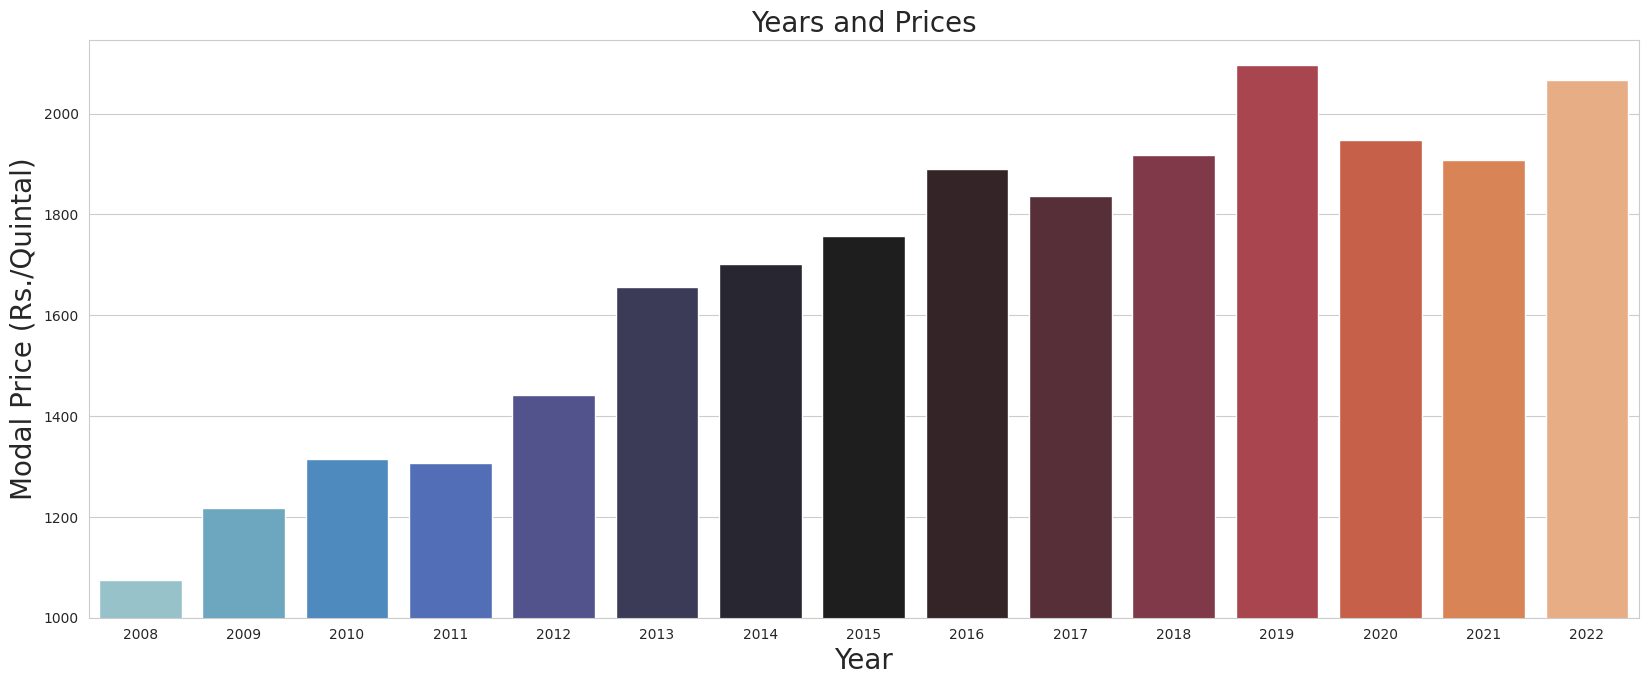

<Figure size 640x480 with 0 Axes>

In [66]:
# Set the figure size
plt.figure(figsize=(20,7.5))

# Create a Horizontal bar plot
sns.set_style('whitegrid')
sns.barplot(x=years_list, y=price_list, palette='icefire')

# Set the plot title and axis labels
plt.title('Years and Prices',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Modal Price (Rs./Quintal)',fontsize=20)


plt.ylim([1000, np.max(price_list)+50])
# Display the plot
plt.show()

# Set the background color
plt.gcf().set_facecolor('green')

In [67]:
df.head(2)

,District Name,Market Name,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,Andhra Pradesh,6,2009
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,Andhra Pradesh,5,2014


In [68]:
## Now we will go for Months and average prices at each month

months = df['Modal Price (Rs./Quintal)'].groupby(df['Month'])
# printing the means value
x=months.mean()
months_list = x.index.tolist()  # extracts the values from the index and converts it to a list
price_list = x.tolist()  # extracts the values from the 'Modal Price (Rs./Quintal)' column and converts it to a list

In [69]:
months_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [70]:
price_list

[1771.964638726153,
 1749.959522994053,
 1726.9654778732195,
 1498.5080617215488,
 1557.6569247300556,
 1659.224600922313,
 1664.062041675549,
 1686.3773739620403,
 1675.803688987143,
 1691.0936604847595,
 1747.7072903286444,
 1753.3758497522756]

In [71]:
for i in range(0, len(price_list)):
  price_list[i] = round(price_list[i],1)

## The importance of each season depends on various factors, including the climate, soil type, and crop patterns in a particular region.

In [72]:
## creating a dataframe with three columns

month_names = ['Jan','Feb',"Mar",'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
crop_season = ['Rabi','Rabi','Zaid','Zaid','Zaid','Kharif','Kharif','Kharif','Kharif','Rabi','Rabi','Rabi']
price_list

[1772.0,
 1750.0,
 1727.0,
 1498.5,
 1557.7,
 1659.2,
 1664.1,
 1686.4,
 1675.8,
 1691.1,
 1747.7,
 1753.4]

In [73]:
dictm = {'month': month_names, 'season': crop_season, 'avg_price': price_list} 
    
kgf = pd.DataFrame(dictm)
    
kgf 

,month,season,avg_price
0,Jan,Rabi,1772.0
1,Feb,Rabi,1750.0
2,Mar,Zaid,1727.0
3,Apr,Zaid,1498.5
4,May,Zaid,1557.7
5,Jun,Kharif,1659.2
6,Jul,Kharif,1664.1
7,Aug,Kharif,1686.4
8,Sep,Kharif,1675.8
9,Oct,Rabi,1691.1


In [74]:
import plotly.express as px

# create a bar chart
fig = px.line(kgf, x="month", y="avg_price",color_discrete_sequence=["brown"])

# set the y-axis limits
fig.update_yaxes(range=[1400, 1800])

# set the chart title
fig.update_layout(title="Average Wheat Prices by Month and Season")

fig.show()

In [75]:
df.head(4)

,District Name,Market Name,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,Andhra Pradesh,6,2009
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,Andhra Pradesh,5,2014
2,Cuddapah,Cuddapah,Other,FAQ,1500.0,1560.0,1530.0,Andhra Pradesh,5,2014
3,Cuddapah,Cuddapah,Other,FAQ,1500.0,1600.0,1550.0,Andhra Pradesh,5,2014


In [76]:
counts = df['District Name'].value_counts()

In [77]:
counts

Ahmednagar     27600
Nashik         20457
Buldhana       19344
Aurangabad     16942
Jalgaon        14384
               ...  
Gajapati           1
Sibsagar           1
Keonjhar           1
Ganjam             1
Khurda             1
Name: District Name, Length: 213, dtype: int64

In [78]:
type(counts)

pandas.core.series.Series

In [79]:
count_df = pd.DataFrame(counts)

In [80]:
count_df

,District Name
Ahmednagar,27600
Nashik,20457
Buldhana,19344
Aurangabad,16942
Jalgaon,14384
...,...
Gajapati,1
Sibsagar,1
Keonjhar,1
Ganjam,1


In [81]:
for i in range(0, count_df.shape[0]):
  print(count_df['District Name'][i])

27600
20457
19344
16942
14384
12699
11220
11191
11077
9997
9828
9299
8781
8578
7927
7641
7371
6710
6496
5795
5589
5509
5417
5170
5033
4548
4518
4390
4366
4339
4299
4273
4027
4006
3719
3639
3618
3471
3432
3253
3222
3137
3124
3080
3065
2931
2864
2801
2775
2748
2671
2605
2507
2423
2370
2361
2324
2297
2186
2176
2173
2142
2099
2098
2041
2034
2013
1961
1934
1921
1915
1867
1833
1828
1814
1774
1773
1756
1724
1675
1639
1588
1552
1515
1513
1480
1462
1428
1426
1405
1394
1374
1263
1204
1173
1164
1160
1159
1138
1099
1088
1059
1021
1014
1005
1003
977
951
943
913
911
872
843
837
806
803
799
795
733
707
644
612
591
587
563
547
538
475
462
430
405
393
392
384
377
368
338
326
316
312
258
240
227
208
203
196
182
182
166
161
145
136
135
124
103
98
98
94
93
89
88
74
62
57
55
52
49
46
44
42
39
33
32
32
31
29
28
26
25
21
20
19
17
17
16
15
14
13
13
12
12
11
10
10
10
9
9
8
5
5
4
4
4
3
3
2
1
1
1
1
1
1
1


### So the count is little more for some categories and less for some categories. We will do count encoding

In [82]:
df.head(2)

,District Name,Market Name,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,Andhra Pradesh,6,2009
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,Andhra Pradesh,5,2014


In [83]:
# Count Encoding for District Name column

# Count encode the 'District Name' column
counts = df['District Name'].value_counts()
df['district_count'] = df['District Name'].map(counts)

df.head(2)

,District Name,Market Name,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year,district_count
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,Andhra Pradesh,6,2009,2324
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,Andhra Pradesh,5,2014,93


## Doing Count Encoding for Market Name column also, since some categories frequency is more and other category frequencies are less!

In [84]:
# Count Encoding for Market Name column

# Count encode the 'Market Name' column
counts = df['Market Name'].value_counts()
df['market_count'] = df['Market Name'].map(counts)

df.head(2)

,District Name,Market Name,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year,district_count,market_count
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,Andhra Pradesh,6,2009,2324,1
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,Andhra Pradesh,5,2014,93,91


In [85]:
df['Variety'].unique()

array(['Lok-1 ', 'Other ', 'Lokwan ', 'Farmi ', 'Dara ', 'Medium Fine ',
       '2189 No. 2 ', '147 Best ', 'Local ', 'Lok -1 (Nilami Rate) ',
       'Coarse ', 'Medium ', 'Red ', 'Deshi ', 'UP 308 ', 'PBW-154 ',
       '147 Average ', 'PBW-343 ', 'PBW-373 ', '2329', 'Sona ',
       'U.P. 301 ', 'Kalyan ', 'Sonalika ', '343', 'MP Sharbati ',
       'Bansi ', 'White ', 'Hybrid ', 'Sharbati ', 'Super Fine ',
       'Chandausi ', 'MP(Desi) ', 'Mexican ', 'WL711 ', 'Raj-3765 ',
       'Dara Mill Quality ', 'TL-1210 ', 'Kanak ', '2189 No. 1 ',
       'Lokwan MP No. 2 ', 'WH-542 ', 'H.D. ', 'Jawari ', 'Kirthi ',
       'Superior ', 'Punjab - Sona Kalyan ', 'Maharashtra 2189 ', '1482',
       'HD-2329 ', 'MP 147 '], dtype=object)

In [86]:
df['Grade'].nunique()

4

In [87]:
df_encoded = pd.get_dummies(df, columns=['Grade'])

In [88]:
df_encoded

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small
0,Visakhapatnam,Anakapally,Lok-1,1400.0,1600.0,1500.0,Andhra Pradesh,6,2009,2324,1,1,0,0,0
1,Cuddapah,Cuddapah,Other,1625.0,1680.0,1653.0,Andhra Pradesh,5,2014,93,91,1,0,0,0
2,Cuddapah,Cuddapah,Other,1500.0,1560.0,1530.0,Andhra Pradesh,5,2014,93,91,1,0,0,0
3,Cuddapah,Cuddapah,Other,1500.0,1600.0,1550.0,Andhra Pradesh,5,2014,93,91,1,0,0,0
4,Cuddapah,Cuddapah,Other,1548.0,1610.0,1579.0,Andhra Pradesh,3,2014,93,91,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470542,Ajmer,Ajmer (Grain),Other,1250.0,2200.0,1350.0,Rajasthan,6,2012,837,837,1,0,0,0
470543,Ajmer,Ajmer (Grain),Other,1300.0,2100.0,1400.0,Rajasthan,6,2012,837,837,1,0,0,0
470544,Ajmer,Ajmer (Grain),Other,1275.0,2275.0,1325.0,Rajasthan,6,2012,837,837,1,0,0,0
470545,Ajmer,Ajmer (Grain),Other,1250.0,2300.0,1300.0,Rajasthan,6,2012,837,837,1,0,0,0


In [89]:
## Checking Variety column's categorical entity frequencies

# Use the value_counts() function to get the frequency of each category
variety_counts = df_encoded['Variety'].value_counts()

# Convert the category_counts series to a dictionary using the to_dict() function
category_dict = variety_counts.to_dict()

In [90]:
category_dict

{'Other ': 305406,
 'Maharashtra 2189 ': 44051,
 'Local ': 21197,
 'Deshi ': 13112,
 'White ': 11748,
 'Sharbati ': 10889,
 'Bansi ': 8266,
 'Medium ': 7293,
 '147 Average ': 7041,
 'Red ': 6277,
 'Mexican ': 5956,
 'Dara ': 3649,
 'Kalyan ': 3258,
 'H.D. ': 3105,
 'Super Fine ': 3102,
 'Lok-1 ': 2625,
 'Sona ': 2586,
 '343': 1719,
 'Medium Fine ': 1715,
 'PBW-343 ': 1200,
 '2329': 872,
 '1482': 701,
 'Kanak ': 653,
 'Jawari ': 633,
 'Coarse ': 511,
 'PBW-373 ': 325,
 'U.P. 301 ': 310,
 'Sonalika ': 308,
 'Superior ': 287,
 '147 Best ': 212,
 'MP Sharbati ': 200,
 'Farmi ': 197,
 'Punjab - Sona Kalyan ': 197,
 'UP 308 ': 175,
 'Kirthi ': 140,
 'PBW-154 ': 138,
 'WL711 ': 124,
 'WH-542 ': 116,
 'Lokwan ': 51,
 'Chandausi ': 41,
 'Hybrid ': 41,
 'Dara Mill Quality ': 37,
 'MP(Desi) ': 34,
 'HD-2329 ': 20,
 '2189 No. 1 ': 19,
 'Raj-3765 ': 3,
 'TL-1210 ': 2,
 'Lokwan MP No. 2 ': 1,
 'Lok -1 (Nilami Rate) ': 1,
 '2189 No. 2 ': 1,
 'MP 147 ': 1}

## We can use count encoding for this since some categories are more in frequency and other categories have less frequency!

In [91]:
df_encoded.head(3)

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small
0,Visakhapatnam,Anakapally,Lok-1,1400.0,1600.0,1500.0,Andhra Pradesh,6,2009,2324,1,1,0,0,0
1,Cuddapah,Cuddapah,Other,1625.0,1680.0,1653.0,Andhra Pradesh,5,2014,93,91,1,0,0,0
2,Cuddapah,Cuddapah,Other,1500.0,1560.0,1530.0,Andhra Pradesh,5,2014,93,91,1,0,0,0


In [92]:
cxe = df_encoded['State'].value_counts()
cxe


Maharashtra         254857
Jharkhand            52341
Karnataka            42094
Punjab               39915
Chattisgarh          28150
Haryana              25242
NCT of Delhi          8578
Bihar                 5455
Kerala                3133
Odisha                2828
Rajasthan             2669
Assam                 2615
Andhra Pradesh        2451
Nagaland                94
Himachal Pradesh        94
Goa                     12
Chandigarh              12
Manipur                  5
Rajast                   1
Name: State, dtype: int64

# We should do count encoding for this State column Also since the frequency of one state is more and some states are infrequent!

In [93]:
# Count encode the 'Market Name' column into the df_encoded column
marcounts = df_encoded['Market Name'].value_counts()
df_encoded['market_count'] = df_encoded['Market Name'].map(marcounts)

# Count encode the 'Variety' column into the df_encoded column
varcounts = df_encoded['Variety'].value_counts()
df_encoded['variety_count'] = df_encoded['Variety'].map(varcounts)

# Count encode the 'State' column into the df_encoded column
stcounts = df_encoded['State'].value_counts()
df_encoded['state_count'] = df_encoded['State'].map(stcounts)

In [94]:
df_encoded.head(5)

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,variety_count,state_count
0,Visakhapatnam,Anakapally,Lok-1,1400.0,1600.0,1500.0,Andhra Pradesh,6,2009,2324,1,1,0,0,0,2625,2451
1,Cuddapah,Cuddapah,Other,1625.0,1680.0,1653.0,Andhra Pradesh,5,2014,93,91,1,0,0,0,305406,2451
2,Cuddapah,Cuddapah,Other,1500.0,1560.0,1530.0,Andhra Pradesh,5,2014,93,91,1,0,0,0,305406,2451
3,Cuddapah,Cuddapah,Other,1500.0,1600.0,1550.0,Andhra Pradesh,5,2014,93,91,1,0,0,0,305406,2451
4,Cuddapah,Cuddapah,Other,1548.0,1610.0,1579.0,Andhra Pradesh,3,2014,93,91,1,0,0,0,305406,2451


In [95]:
df_encoded.head(2)

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,variety_count,state_count
0,Visakhapatnam,Anakapally,Lok-1,1400.0,1600.0,1500.0,Andhra Pradesh,6,2009,2324,1,1,0,0,0,2625,2451
1,Cuddapah,Cuddapah,Other,1625.0,1680.0,1653.0,Andhra Pradesh,5,2014,93,91,1,0,0,0,305406,2451


In [96]:
## Just changing the order of the dataframe
df_modified = df_encoded.loc[:, ['Month', 'Year', 'district_count', 'market_count', 'Grade_FAQ ', 'Grade_Large ', 'Grade_Medium ', 'Grade_Small ', 'variety_count', 'state_count', 'Modal Price (Rs./Quintal)','District Name','Market Name','State','Variety','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)']]
df_modified.head(3)

,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,variety_count,state_count,Modal Price (Rs./Quintal),District Name,Market Name,State,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
0,6,2009,2324,1,1,0,0,0,2625,2451,1500.0,Visakhapatnam,Anakapally,Andhra Pradesh,Lok-1,1400.0,1600.0
1,5,2014,93,91,1,0,0,0,305406,2451,1653.0,Cuddapah,Cuddapah,Andhra Pradesh,Other,1625.0,1680.0
2,5,2014,93,91,1,0,0,0,305406,2451,1530.0,Cuddapah,Cuddapah,Andhra Pradesh,Other,1500.0,1560.0


In [97]:
df_modified.shape

(470546, 17)

## I have encoded the categorical columns , now lets gather all the features and their values that they have been encoded with! 

In [98]:
df.head(0)

,District Name,Market Name,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year,district_count,market_count


In [99]:
col1 = df_encoded['District Name'].value_counts()
col1


Ahmednagar     27600
Nashik         20457
Buldhana       19344
Aurangabad     16942
Jalgaon        14384
               ...  
Gajapati           1
Sibsagar           1
Keonjhar           1
Ganjam             1
Khurda             1
Name: District Name, Length: 213, dtype: int64

In [100]:
col2 = df_encoded['Market Name'].value_counts()
col2


Nagpur                               4775
Najafgarh                            4490
Pakur                                4390
Jalana                               4228
Bijapur                              4142
                                     ... 
Armori                                  1
Jalandhar Cantt(Hoshiarpur Road)        1
Basmat(Kurunda)                         1
Fruit Market                            1
Anakapally                              1
Name: Market Name, Length: 973, dtype: int64

In [101]:
col3 = df_encoded['Variety'].value_counts()
col3

Other                    305406
Maharashtra 2189          44051
Local                     21197
Deshi                     13112
White                     11748
Sharbati                  10889
Bansi                      8266
Medium                     7293
147 Average                7041
Red                        6277
Mexican                    5956
Dara                       3649
Kalyan                     3258
H.D.                       3105
Super Fine                 3102
Lok-1                      2625
Sona                       2586
343                        1719
Medium Fine                1715
PBW-343                    1200
2329                        872
1482                        701
Kanak                       653
Jawari                      633
Coarse                      511
PBW-373                     325
U.P. 301                    310
Sonalika                    308
Superior                    287
147 Best                    212
MP Sharbati                 200
Farmi   

In [102]:
col4 = df_encoded['State'].value_counts()
col4

Maharashtra         254857
Jharkhand            52341
Karnataka            42094
Punjab               39915
Chattisgarh          28150
Haryana              25242
NCT of Delhi          8578
Bihar                 5455
Kerala                3133
Odisha                2828
Rajasthan             2669
Assam                 2615
Andhra Pradesh        2451
Nagaland                94
Himachal Pradesh        94
Goa                     12
Chandigarh              12
Manipur                  5
Rajast                   1
Name: State, dtype: int64

# Removing Outlayers

In [103]:
df_modified.head(2)

,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,variety_count,state_count,Modal Price (Rs./Quintal),District Name,Market Name,State,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
0,6,2009,2324,1,1,0,0,0,2625,2451,1500.0,Visakhapatnam,Anakapally,Andhra Pradesh,Lok-1,1400.0,1600.0
1,5,2014,93,91,1,0,0,0,305406,2451,1653.0,Cuddapah,Cuddapah,Andhra Pradesh,Other,1625.0,1680.0


In [104]:
cols = ['Month',
 'Year',
 'district_count',
 'market_count',
 'Grade_FAQ ',
 'Grade_Large ',
 'Grade_Medium ',
 'Grade_Small ',
 'variety_count',
 'state_count',
 'Modal Price (Rs./Quintal)']

## Visualizing the outlayers for columns!

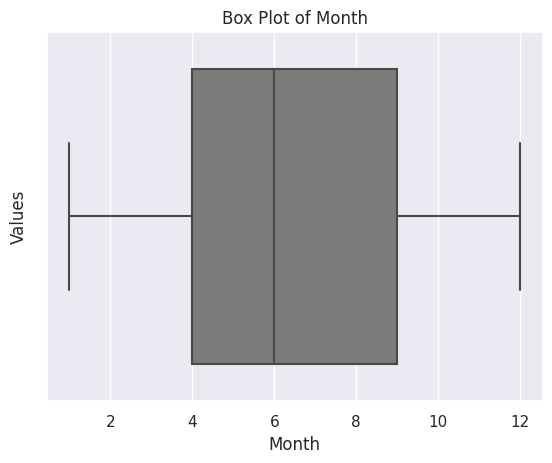

------------------------------------------------------


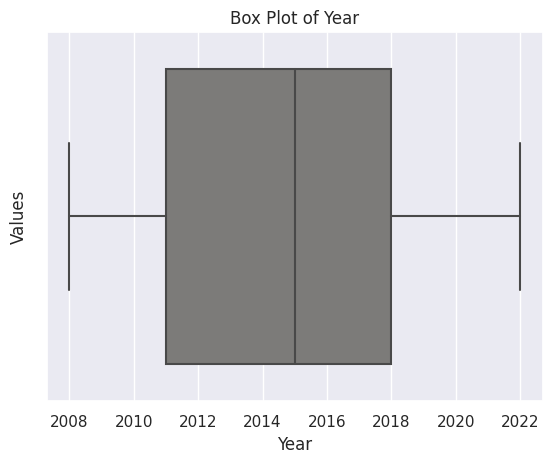

------------------------------------------------------


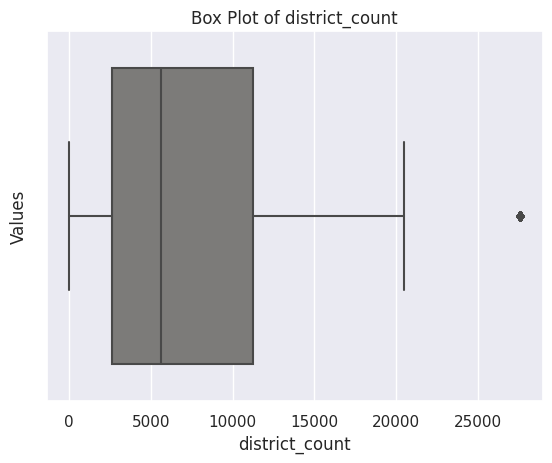

------------------------------------------------------


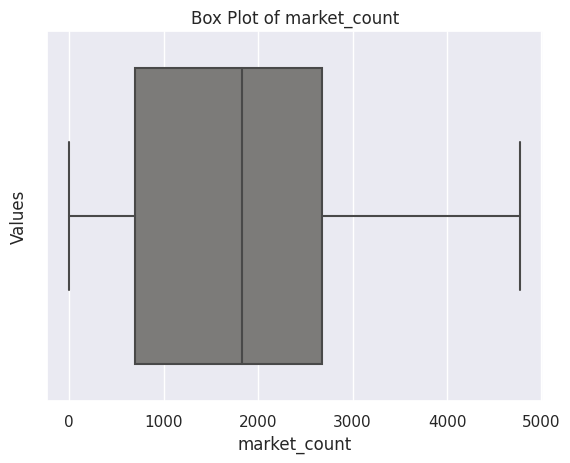

------------------------------------------------------


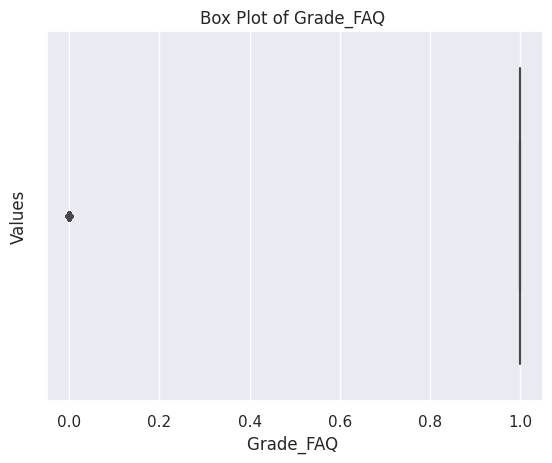

------------------------------------------------------


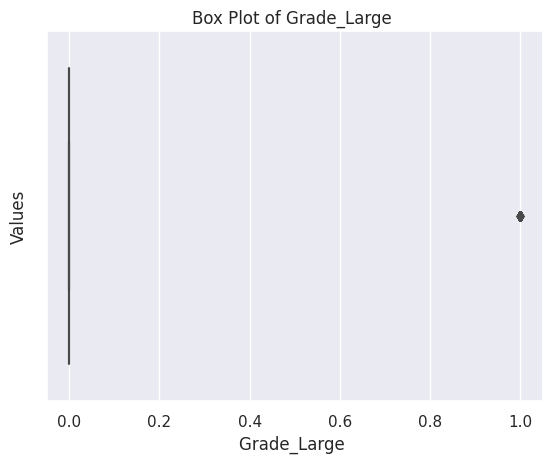

------------------------------------------------------


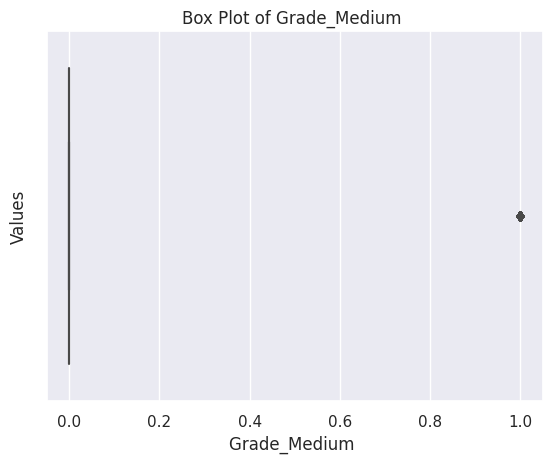

------------------------------------------------------


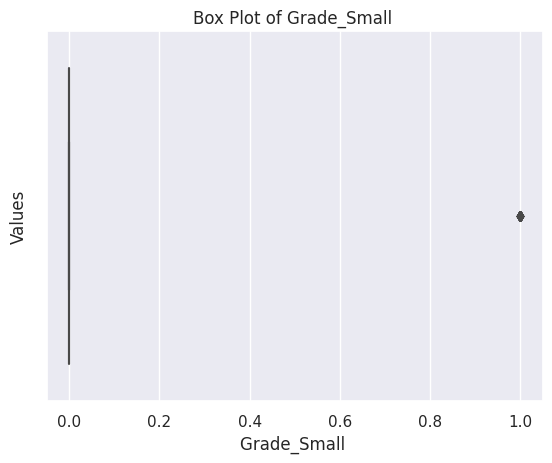

------------------------------------------------------


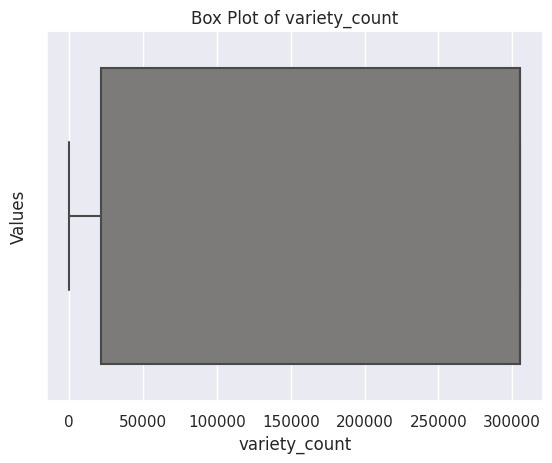

------------------------------------------------------


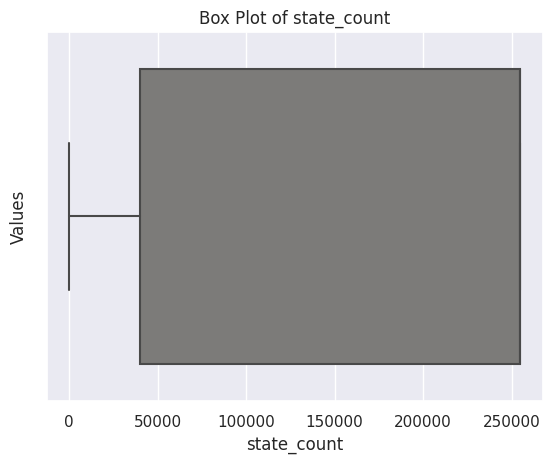

------------------------------------------------------


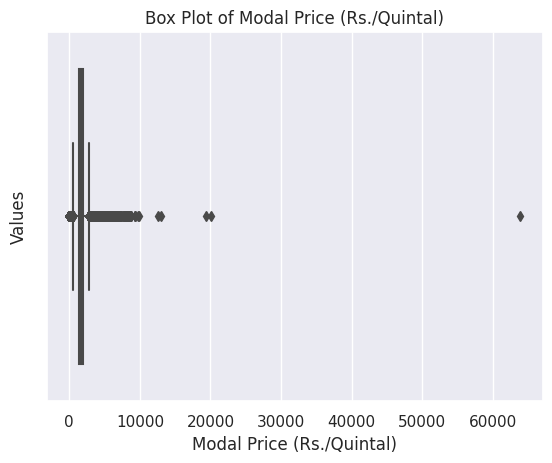

------------------------------------------------------


In [105]:
import seaborn as sns

sns.set(palette="coolwarm")

for column_name in list(cols):
    # Create a box plot of the column
    fig, ax = plt.subplots()
    ax = sns.boxplot(x=df_modified[column_name], palette="cividis")

    # Set the title and axis labels
    ax.set_title('Box Plot of {}'.format(column_name))
    ax.set_xlabel(column_name)
    ax.set_ylabel('Values')

    # Show the plot
    plt.show()
    print("------------------------------------------------------")


## I am omiting the one hot encoded columns for outlayers detection

In [106]:
cols = ['Month',
 'Year',
 'district_count',
 'market_count',
 'variety_count',
 'state_count',
 'Modal Price (Rs./Quintal)']

In [107]:
# Define a function to detect and remove outliers using the z-score method
def remove_outliers(column, threshold):
    z_scores = np.abs((column - column.mean()) / column.std())
    outliers = z_scores > threshold
    column[outliers] = np.nan
    return column

# Remove outliers in the 'cols' column using a threshold of 3

for i in range(0, len(cols)):
  column_name = cols[i]
  threshold = 3
  df_modified[column_name] = remove_outliers(df_modified[column_name], threshold)
  

# Drop rows with missing values (outliers)
df_modified.dropna(inplace=True)

<ipython-input-107-6519454fcb7f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-107-6519454fcb7f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-107-6519454fcb7f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-107-6519454fcb7f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [108]:
df_modified.head(5)

,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,variety_count,state_count,Modal Price (Rs./Quintal),District Name,Market Name,State,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
0,6,2009,2324,1,1,0,0,0,2625,2451,1500.0,Visakhapatnam,Anakapally,Andhra Pradesh,Lok-1,1400.0,1600.0
1,5,2014,93,91,1,0,0,0,305406,2451,1653.0,Cuddapah,Cuddapah,Andhra Pradesh,Other,1625.0,1680.0
2,5,2014,93,91,1,0,0,0,305406,2451,1530.0,Cuddapah,Cuddapah,Andhra Pradesh,Other,1500.0,1560.0
3,5,2014,93,91,1,0,0,0,305406,2451,1550.0,Cuddapah,Cuddapah,Andhra Pradesh,Other,1500.0,1600.0
4,3,2014,93,91,1,0,0,0,305406,2451,1579.0,Cuddapah,Cuddapah,Andhra Pradesh,Other,1548.0,1610.0


In [109]:
df_modified.shape

(461350, 17)

In [110]:
df_action = df_modified.iloc[:, 0:11]

In [111]:
df_action

,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,variety_count,state_count,Modal Price (Rs./Quintal)
0,6,2009,2324,1,1,0,0,0,2625,2451,1500.0
1,5,2014,93,91,1,0,0,0,305406,2451,1653.0
2,5,2014,93,91,1,0,0,0,305406,2451,1530.0
3,5,2014,93,91,1,0,0,0,305406,2451,1550.0
4,3,2014,93,91,1,0,0,0,305406,2451,1579.0
...,...,...,...,...,...,...,...,...,...,...,...
470542,6,2012,837,837,1,0,0,0,305406,2669,1350.0
470543,6,2012,837,837,1,0,0,0,305406,2669,1400.0
470544,6,2012,837,837,1,0,0,0,305406,2669,1325.0
470545,6,2012,837,837,1,0,0,0,305406,2669,1300.0


In [112]:
df_action = df_action.reset_index()

In [113]:
df_action

,index,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,variety_count,state_count,Modal Price (Rs./Quintal)
0,0,6,2009,2324,1,1,0,0,0,2625,2451,1500.0
1,1,5,2014,93,91,1,0,0,0,305406,2451,1653.0
2,2,5,2014,93,91,1,0,0,0,305406,2451,1530.0
3,3,5,2014,93,91,1,0,0,0,305406,2451,1550.0
4,4,3,2014,93,91,1,0,0,0,305406,2451,1579.0
...,...,...,...,...,...,...,...,...,...,...,...,...
461345,470542,6,2012,837,837,1,0,0,0,305406,2669,1350.0
461346,470543,6,2012,837,837,1,0,0,0,305406,2669,1400.0
461347,470544,6,2012,837,837,1,0,0,0,305406,2669,1325.0
461348,470545,6,2012,837,837,1,0,0,0,305406,2669,1300.0


In [114]:
df_action = df_action.drop('index',axis=1)

In [115]:
df_action

,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,variety_count,state_count,Modal Price (Rs./Quintal)
0,6,2009,2324,1,1,0,0,0,2625,2451,1500.0
1,5,2014,93,91,1,0,0,0,305406,2451,1653.0
2,5,2014,93,91,1,0,0,0,305406,2451,1530.0
3,5,2014,93,91,1,0,0,0,305406,2451,1550.0
4,3,2014,93,91,1,0,0,0,305406,2451,1579.0
...,...,...,...,...,...,...,...,...,...,...,...
461345,6,2012,837,837,1,0,0,0,305406,2669,1350.0
461346,6,2012,837,837,1,0,0,0,305406,2669,1400.0
461347,6,2012,837,837,1,0,0,0,305406,2669,1325.0
461348,6,2012,837,837,1,0,0,0,305406,2669,1300.0


## If there is a large difference between some values in your count encoded columns, it may be a good idea to normalize the data to improve the performance of your regression model. Normalization can help to mitigate the impact of these large differences and bring the features to a similar scale.

For example, if you have a count encoded column where the counts range from 100 to 20,000, the large difference in scale can make it difficult for some regression models to learn effectively from the data. By normalizing the data, you can rescale the counts to a similar range, such as between 0 and 1(in case of normalization) and (-1 to 1 and mean mue and variance sigma^2 in case of standardization), which can make it easier for the model to learn.
# We are going to normalize the count Encoded columns because of the large difference in the values.....
Lets do It!

## Normalization & Standardization

#### Target Columns

In [116]:
norm_cols = ['district_count',
 'market_count',
 'variety_count',
 'state_count']

In [117]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# df_reaction is a copy of df_action !!!

In [118]:
df_reaction = df_action
df_reaction.head(2)

,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,variety_count,state_count,Modal Price (Rs./Quintal)
0,6,2009,2324,1,1,0,0,0,2625,2451,1500.0
1,5,2014,93,91,1,0,0,0,305406,2451,1653.0


### Min_Max Scalar Normalization

In [119]:
# Min-max scaling
scaler = MinMaxScaler()
df_reaction[['dmm','mmm','vmm','smm']] = scaler.fit_transform(df_reaction[norm_cols])

# Print the DataFrame with the scaled and columns
df_reaction.head(5)

,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,variety_count,state_count,Modal Price (Rs./Quintal),dmm,mmm,vmm,smm
0,6,2009,2324,1,1,0,0,0,2625,2451,1500.0,0.084170,0.000000,0.008592,0.009613
1,5,2014,93,91,1,0,0,0,305406,2451,1653.0,0.003333,0.018852,1.000000,0.009613
2,5,2014,93,91,1,0,0,0,305406,2451,1530.0,0.003333,0.018852,1.000000,0.009613
3,5,2014,93,91,1,0,0,0,305406,2451,1550.0,0.003333,0.018852,1.000000,0.009613
4,3,2014,93,91,1,0,0,0,305406,2451,1579.0,0.003333,0.018852,1.000000,0.009613


### Z-score standardization

In [120]:
# Z-score normalization
scaler = StandardScaler()

df_reaction[['dzs','mzs','vzs','szs']] = scaler.fit_transform(df_reaction[norm_cols])

# Print the DataFrame with the scaled and columns
df_reaction.head(5)

,Month,Year,district_count,market_count,Grade_FAQ,Grade_Large,Grade_Medium,Grade_Small,variety_count,state_count,Modal Price (Rs./Quintal),dmm,mmm,vmm,smm,dzs,mzs,vzs,szs
0,6,2009,2324,1,1,0,0,0,2625,2451,1500.0,0.084170,0.000000,0.008592,0.009613,-0.836125,-1.505552,-1.485671,-1.395848
1,5,2014,93,91,1,0,0,0,305406,2451,1653.0,0.003333,0.018852,1.000000,0.009613,-1.136158,-1.430846,0.729418,-1.395848
2,5,2014,93,91,1,0,0,0,305406,2451,1530.0,0.003333,0.018852,1.000000,0.009613,-1.136158,-1.430846,0.729418,-1.395848
3,5,2014,93,91,1,0,0,0,305406,2451,1550.0,0.003333,0.018852,1.000000,0.009613,-1.136158,-1.430846,0.729418,-1.395848
4,3,2014,93,91,1,0,0,0,305406,2451,1579.0,0.003333,0.018852,1.000000,0.009613,-1.136158,-1.430846,0.729418,-1.395848


In [121]:
new_names = {'Grade_FAQ ': 'grade_faq',
             'Grade_Large ':'grade_large',
        'Grade_Medium ': 'grade_medium',
        'Grade_Small ': 'grade_small',
        }
 
# call rename () method
df_reaction.rename(columns=new_names,
          inplace=True)

In [122]:
df_reaction.head(2)

,Month,Year,district_count,market_count,grade_faq,grade_large,grade_medium,grade_small,variety_count,state_count,Modal Price (Rs./Quintal),dmm,mmm,vmm,smm,dzs,mzs,vzs,szs
0,6,2009,2324,1,1,0,0,0,2625,2451,1500.0,0.084170,0.000000,0.008592,0.009613,-0.836125,-1.505552,-1.485671,-1.395848
1,5,2014,93,91,1,0,0,0,305406,2451,1653.0,0.003333,0.018852,1.000000,0.009613,-1.136158,-1.430846,0.729418,-1.395848


## Lets take prices per kg also into another column

In [123]:
df_reaction['price_kg'] = df_reaction['Modal Price (Rs./Quintal)'].div(100)


In [124]:
variety_counts = df_encoded['Variety'].value_counts()
variety_dict = variety_counts.to_dict()

district_counts = df_encoded['District Name'].value_counts()
district_dict = district_counts.to_dict()

market_counts = df_encoded['Market Name'].value_counts()
market_dict = market_counts.to_dict()

state_counts = df_encoded['State'].value_counts()
state_dict = state_counts.to_dict()

In [125]:
encodings = {**variety_dict, **district_dict, **market_dict, **state_dict}


In [126]:
encodings['Andhra Pradesh']

2451

In [127]:
# create a new dictionary to store the modified key-value pairs
new_dict = {}
for key, value in encodings.items():
    # check if the key contains spaces
    if ' ' in key:
        # remove spaces and update the key-value pair
        new_key = key.replace(' ', '')
        # check if the modified key already exists in the dictionary
        if new_key in new_dict:
            # merge the values if desired
            new_dict[new_key] += value
        else:
            new_dict[new_key] = value
    else:
        new_dict[key] = value
# update the original dictionary with the modified key-value pairs
encodings.clear()
encodings.update(new_dict)

In [128]:
encodings["Andhra Pradesh"]= 2451

In [129]:
len(encodings)

1138

# Heat Map

In [130]:
heat_map_cols = ['Month','Year','dmm',	'mmm'	,'vmm',	'smm','grade_faq','grade_large','grade_medium','grade_small','Modal Price (Rs./Quintal)']
heat_data = df_reaction[heat_map_cols]
heat_data = heat_data.rename(columns={'Month': 'Month',
                        'Year': 'Year',
                        'dmm': 'District',
                        'mmm': 'Market',
                        'vmm': 'Variety',
                        'smm': 'State',
                        'grade_faq': 'FAQ',
                        'grade_large': 'Large',
                        'grade_medium': 'Medium',
                        'grade_small': 'Small',
                        'Modal Price (Rs./Quintal)': 'Price'
                        })



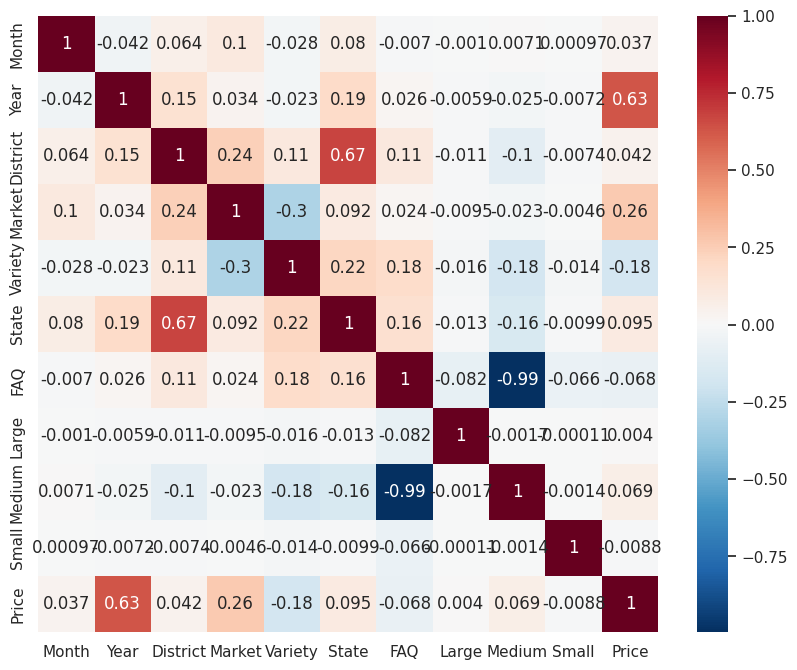

In [131]:
corr_matrix = heat_data.corr()

# Create heatmap using Seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=True, ax=ax)

# Show plot
plt.show()

## I think the data is preprocessed Lets dump it into various models!!

# Regression
## *We will check with both types of columns(Min-Max Normalized and Z-score)...

## Evaluation Metric function

In [132]:
# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of MSE
  print(f"Mean Squared error is: {metrics.mean_squared_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
min_max_features = ['Month','Year','dmm',	'mmm'	,'vmm',	'smm','grade_faq','grade_large','grade_medium','grade_small']
target = ['Modal Price (Rs./Quintal)']

In [135]:
X = df_reaction.loc[:, min_max_features]
y = df_reaction.loc[:, target]

## Multiple Linear Regression

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 0)

In [137]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train,y_train)

LinearRegression()

In [138]:
y_pred = regressor1.predict(X_test)
y_pred

array([[1350.62428647],
       [2104.3977496 ],
       [1938.03002768],
       ...,
       [1612.86874261],
       [1859.78424498],
       [1459.43355567]])

In [139]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 212.29562521544432
Mean Squared error is: 83183.65265743888
Root Mean Square error is: 288.41576353840105
R2 score is: 0.48238347542837523


## Forward Stepwise selection

In [140]:
X = df_reaction.loc[:, min_max_features]
y = df_reaction.loc[:, target]

In [141]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def forward_stepwise_selection(X, y):
    # Initialize an empty set of features
    selected_features = []
    
    # Initialize a linear regression model
    model = LinearRegression()
    
    # Loop until all features have been added to the model
    while len(selected_features) < X.shape[1]:
        
        # Initialize variables to keep track of best feature and score
        best_feature = None
        best_score = -np.inf
        
        # Loop over all remaining features
        for feature in X.columns:
            if feature not in selected_features:
                # Fit a model with the current set of features plus the new feature
                current_features = selected_features + [feature]
                X_current = X[current_features]
                model.fit(X_current, y)
                
                # Calculate the score for the new model
                y_pred = model.predict(X_current)
                score = r2_score(y, y_pred)
                
                # Keep track of the best feature and score
                if score > best_score:
                    best_feature = feature
                    best_score = score
        
        # Add the best feature to the selected features and print the result
        selected_features.append(best_feature)
        print(f'Selected feature: {best_feature}, Score: {best_score:.4f}')
        
    return selected_features


In [142]:
select_features = forward_stepwise_selection(X,y)

Selected feature: Year, Score: 0.3971
Selected feature: mmm, Score: 0.4545
Selected feature: dmm, Score: 0.4676
Selected feature: grade_faq, Score: 0.4737
Selected feature: vmm, Score: 0.4773
Selected feature: smm, Score: 0.4807
Selected feature: Month, Score: 0.4823
Selected feature: grade_small, Score: 0.4824
Selected feature: grade_medium, Score: 0.4824
Selected feature: grade_large, Score: 0.4824


In [143]:
select_features

['Year',
 'mmm',
 'dmm',
 'grade_faq',
 'vmm',
 'smm',
 'Month',
 'grade_small',
 'grade_medium',
 'grade_large']

## Regression with these features

In [144]:
X = df_reaction.loc[:, select_features]
y = df_reaction.loc[:, target]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 0)

In [146]:
from sklearn.linear_model import LinearRegression
regressorsf = LinearRegression()
regressorsf.fit(X_train,y_train)

LinearRegression()

In [147]:
y_pred = regressorsf.predict(X_test)
y_pred

array([[1350.62428647],
       [2104.3977496 ],
       [1938.03002768],
       ...,
       [1612.86874261],
       [1859.78424498],
       [1459.43355567]])

In [148]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 212.29562521544324
Mean Squared error is: 83183.65265743919
Root Mean Square error is: 288.4157635384016
R2 score is: 0.48238347542837334


### Decision Tree Regression 

In [149]:
from sklearn.tree import DecisionTreeRegressor

X = df_reaction.loc[:, min_max_features]
y = df_reaction.loc[:, target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Decision Tree Regression
# Create decision tree regressor object
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

In [150]:
Emetrics(y_test, y_pred)

Mean Absoulute error is : 60.668497853684705
Mean Squared error is: 14516.36522538215
Root Mean Square error is: 120.48387952494785
R2 score is: 0.9093177766618047


## Random Forest Regression

In [151]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


X = df_reaction.loc[:, min_max_features]
y = df_reaction.loc[:, target]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train the model using the training sets
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test)


<ipython-input-151-1a94dd32261e>:14: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [152]:
Emetrics(y_test,y_pred)

Mean Absoulute error is : 59.49846688847117
Mean Squared error is: 13116.984312842498
Root Mean Square error is: 114.52940370421256
R2 score is: 0.9180595636364286


## Xgboost Regression

In [153]:
from xgboost import XGBRegressor

# Load the dataset
X = df_reaction.loc[:, min_max_features]
y = df_reaction.loc[:, target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

# Create the XGBoost regression model
model = XGBRegressor(n_estimators=350, learning_rate=0.25)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)


Mean Absoulute error is : 75.95086058648204
Mean Squared error is: 15273.189642886773
Root Mean Square error is: 123.58474680512467
R2 score is: 0.9043214899832978


## Saving all the models!

In [154]:
import pickle

In [155]:
# Save the first trained model to disk
lr1 = 'wlinear_regression_model1.sav'
pickle.dump(regressor1, open(lr1, 'wb'))

# Save the second trained model to disk
dtr2 = 'wdecision_regression_model2.sav'
pickle.dump(dt_regressor, open(dtr2, 'wb'))

# Save the third trained model to disk
rfr3 = 'wrandomforest_regression_model3.sav'
pickle.dump(rf_regressor, open(rfr3, 'wb'))

# Save the fourth trained model to disk
xgbr4 = 'wxgboost_regression_model2.sav'
pickle.dump(model, open(xgbr4, 'wb'))

# Load the saved models from disk
linear_reg = pickle.load(open(lr1, 'rb'))
decisiontree_reg = pickle.load(open(dtr2, 'rb'))
randomforest_reg = pickle.load(open(rfr3, 'rb'))
xgboost_reg = pickle.load(open(xgbr4, 'rb'))


# Which is the best model?


In [156]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

X = ['Linear', 'Decision Tree', 'Random Forest', 'XGBoost']
MAE = [212.2956, 60.6684, 59.4984, 75.9508]
RMSE = [288.4157, 120.4838, 114.5294, 123.5847]
R2 = [0.4823, 0.9093, 0.9180, 0.9043]

# Plot 1
fig = go.Figure([go.Bar(x=X, y=MAE, marker=dict(color='pink'))])
fig.update_layout(title='Regression Models and Mean Absolute Error', xaxis_title='Regression Model',
                  yaxis_title='Mean Absolute Error', yaxis_range=[55, 62])
fig.update_traces(text=MAE, textposition='auto')
fig.show()

# Plot 2
fig = go.Figure([go.Bar(x=X, y=RMSE, marker=dict(color='violet'))])
fig.update_layout(title='Regression Models and Root Mean Square Error', xaxis_title='Regression Model',
                  yaxis_title='Root Mean Square Error', yaxis_range=[100, 140])
fig.update_traces(text=RMSE, textposition='auto')
fig.show()

# Plot 3
fig = go.Figure([go.Bar(x=X, y=R2, marker=dict(color='maroon'))])
fig.update_layout(title='Regression Models and R2-score', xaxis_title='Regression Model',
                  yaxis_title='R2-score', yaxis_range=[0.9, 0.925])
fig.update_traces(text=R2, textposition='auto')
fig.show()


# Taking user given input and predicting the price of the crop!

In [157]:
def inputs(kj):
  input_dict = {
      "Month":1,
      "Year":2,
      "District Name":3,
      "Market Name":4,
      "Variety":4.5,
      "Grade":5,
      'State':6,
      'district_count':7,
      'market_count':8,
      'grade_faq':0,
      'grade_large':0,
      'grade_medium':0,
      'grade_small':0,
      'variety_count':13,
      'state_count':14,
      'dmm':15,
      'mmm':16,
      'vmm':17,
      'smm':18,
      'dzs':19,
      'mzs':20,
      'vzs':21,
      'szs':22
  } 
  print("-------------------Hi User, Enter the Following Details----------------")
  for i in range(1, 8):
    key = list(input_dict.keys())[i-1]
    input_dict[key] = input(f"Enter the {key}: ")
  
  ## Converting data types of keys to their correct ones
  input_dict['Month'] = int(input_dict['Month'])
  input_dict['Year'] = int(input_dict['Year'])
  input_dict['district_count'] = encodings[input_dict['District Name']]
  input_dict['market_count'] = encodings[input_dict['Market Name']]
  input_dict['state_count'] = encodings[input_dict['State']]
  input_dict['variety_count'] = encodings[input_dict['Variety']]
  
  
  if(input_dict['Grade']=='FAQ'):
    input_dict['grade_faq'] =1
  elif(input_dict['Grade']=='Medium'):
    input_dict['grade_medium'] =1
  elif(input_dict['Grade']=='Large'):
    input_dict['grade_large'] =1
  else:
    input_dict['grade_small'] =1
  
  ndmm = (input_dict['district_count'] - df_reaction['district_count'].min()) / (df_reaction['district_count'].max() - df_reaction['district_count'].min())  
  ndzs = (input_dict['district_count'] - df_reaction['district_count'].mean()) / df_reaction['district_count'].std()

  nmmm = (input_dict['market_count'] - df_reaction['market_count'].min()) / (df_reaction['market_count'].max() - df_reaction['market_count'].min())  
  nmzs = (input_dict['market_count'] - df_reaction['market_count'].mean()) / df_reaction['market_count'].std() 

  nvmm = (input_dict['variety_count'] - df_reaction['variety_count'].min()) / (df_reaction['variety_count'].max() - df_reaction['variety_count'].min())  
  nvzs = (input_dict['variety_count'] - df_reaction['variety_count'].mean()) / df_reaction['variety_count'].std()

  nsmm = (input_dict['state_count'] - df_reaction['state_count'].min()) / (df_reaction['state_count'].max() - df_reaction['state_count'].min())  
  nszs = (input_dict['state_count'] - df_reaction['state_count'].mean()) / df_reaction['state_count'].std()

  ## Updating  Min Max Values and Z-score values for the given input
  
  #Min Max values
  input_dict['dmm'] = ndmm
  input_dict['mmm'] = nmmm
  input_dict['vmm'] = nvmm
  input_dict['smm'] = nsmm

  #z-score values
  input_dict['dzs'] = ndzs
  input_dict['mzs'] = nmzs
  input_dict['vzs'] = nvzs
  input_dict['szs'] = nszs

  if(kj==1):
    a = input_dict['Month']
    b = input_dict['Year']
    c = input_dict['dmm']
    d = input_dict['mmm']
    e = input_dict['vmm']
    f = input_dict['smm']
    g = input_dict['grade_faq']
    h = input_dict['grade_large']
    i = input_dict['grade_medium']
    j = input_dict['grade_small']
    
    return([a,b,c,d,e,f,g,h,i,j])


  if(kj==2):
    a = input_dict['Month']
    b = input_dict['Year']
    c = input_dict['dzs']
    d = input_dict['mzs']
    e = input_dict['vzs']
    f = input_dict['szs']
    g = input_dict['grade_faq']
    h = input_dict['grade_large']
    i = input_dict['grade_medium']
    j = input_dict['grade_small']

    return([a,b,c,d,e,f,g,h,i,j])

mmlist = inputs(1)

-------------------Hi User, Enter the Following Details----------------
Enter the Month: 4
Enter the Year: 2023
Enter the District Name: Visakhapatnam
Enter the Market Name: Anakapally
Enter the Variety: Lok-1
Enter the Grade: FAQ
Enter the State: Andhra Pradesh


In [158]:
df['State'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chattisgarh', 'Chandigarh',
       'NCT of Delhi', 'Goa', 'Himachal Pradesh', 'Haryana', 'Jharkhand',
       'Karnataka', 'Kerala', 'Maharashtra', 'Manipur', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Rajast'], dtype=object)

In [159]:
k =df[df['State'] == 'Chattisgarh']

In [160]:
k

,District Name,Market Name,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),State,Month,Year,district_count,market_count
10521,Durg,Ahivara,Other,FAQ,1525.0,1525.0,1525.0,Chattisgarh,5,2017,1774,35
10522,Durg,Ahivara,Other,FAQ,1525.0,1525.0,1525.0,Chattisgarh,2,2017,1774,35
10523,Durg,Ahivara,Other,FAQ,1525.0,1525.0,1525.0,Chattisgarh,2,2017,1774,35
10524,Durg,Ahivara,Other,FAQ,1525.0,1525.0,1525.0,Chattisgarh,2,2017,1774,35
10525,Durg,Ahivara,Other,FAQ,1525.0,1525.0,1525.0,Chattisgarh,2,2017,1774,35
...,...,...,...,...,...,...,...,...,...,...,...,...
38666,Bilaspur,Takhatpur,Medium,FAQ,1600.0,1600.0,1600.0,Chattisgarh,9,2008,2775,423
38667,Bastar,Tokapal,Local,FAQ,1500.0,1500.0,1500.0,Chattisgarh,4,2014,136,1
38668,Kondagaon,Vishrampur,147 Average,FAQ,2000.0,2000.0,2000.0,Chattisgarh,11,2019,182,3
38669,Kondagaon,Vishrampur,147 Average,FAQ,1700.0,1800.0,1750.0,Chattisgarh,7,2018,182,3


In [161]:
k['Variety'].unique()

array(['Other ', 'Local ', '147 Average ', 'Bansi ', 'Deshi ', 'White ',
       'Medium ', 'Hybrid ', 'Lok-1 ', 'Sharbati ', 'Lokwan ',
       'Super Fine ', 'Medium Fine ', 'Coarse ', 'Chandausi ',
       'MP(Desi) ', '147 Best '], dtype=object)

In [162]:
k[k['District Name']=='Bilaspur ']['Market Name'].unique()

array(['Bilaspur ', 'Bilha ', 'Gaurella ', 'Kota ', 'Pendraroad ',
       'Ratanpur ', 'Sakri ', 'Takhatpur '], dtype=object)

## Predicting result for the user given input values!

In [163]:
# Make predictions using the loaded models
y_pred_rf = randomforest_reg.predict(np.array(mmlist).reshape(1, -1))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [164]:
print(f"The Wheat Price per Quintal is: {y_pred_rf[0]}")

The Wheat Price per Quintal is: 2299.7915842490843


## Lets Work on Some Statistical Models

In [165]:
df_copy.head(2)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State,Month,Year
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27062009,Andhra Pradesh,6,2009
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13052014,Andhra Pradesh,5,2014


In [166]:
df_copy.isna().sum()

District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
State                        0
Month                        0
Year                         0
dtype: int64

# ARIMA

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [168]:
df_copy.head(5)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State,Month,Year
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27062009,Andhra Pradesh,6,2009
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13052014,Andhra Pradesh,5,2014
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12052014,Andhra Pradesh,5,2014
3,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1600.0,1550.0,10052014,Andhra Pradesh,5,2014
4,Cuddapah,Cuddapah,Wheat,Other,FAQ,1548.0,1610.0,1579.0,20032014,Andhra Pradesh,3,2014


In [169]:
year_series = df_copy.groupby('Year', as_index=False)['Modal Price (Rs./Quintal)'].mean()

In [170]:
year_series

,Year,Modal Price (Rs./Quintal)
0,2008,1074.494290
1,2009,1218.122571
2,2010,1314.766651
3,2011,1306.241710
4,2012,1441.764844
5,2013,1656.351224
6,2014,1702.311573
7,2015,1756.594577
8,2016,1890.299784
9,2017,1837.508953


In [171]:
year_series['price_kg'] = year_series['Modal Price (Rs./Quintal)'] / 100

In [172]:
year_series = year_series.drop('Modal Price (Rs./Quintal)',axis=1)

In [173]:
year_series

,Year,price_kg
0,2008,10.744943
1,2009,12.181226
2,2010,13.147667
3,2011,13.062417
4,2012,14.417648
5,2013,16.563512
6,2014,17.023116
7,2015,17.565946
8,2016,18.902998
9,2017,18.375090


In [174]:
data = year_series

In [175]:
# Split the data into a training set and a test set
train = data[data['Year'] <= 2017]
test = data[data['Year'] > 2017]


# Getting p,d,q values by Auto-ARIMA

In [176]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.1 MB/s eta 0:00:00


In [177]:
from pmdarima.arima import auto_arima

# Extract the time series data from the 'price_kg' column of data
ts_data = data['price_kg']

# Use auto_arima to automatically determine the best p, d, and q values
model = auto_arima(ts_data, seasonal=False, suppress_warnings=True)

# Print the model summary, which includes the selected p, d, and q values
print(model.summary())




                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -19.701
Date:                Tue, 04 Apr 2023   AIC                             43.402
Time:                        15:14:53   BIC                             44.680
Sample:                             0   HQIC                            43.284
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7091      0.305      2.324      0.020       0.111       1.307
sigma2         0.9768      0.488      2.004      0.045       0.021       1.932
Ljung-Box (L1) (Q):                   0.27   Jarque-

In [178]:
test

,Year,price_kg
10,2018,19.172044
11,2019,20.957255
12,2020,19.483789
13,2021,19.078684
14,2022,20.672467


In [179]:
# Fit an ARIMA(1,2,1) model to the training data
model = ARIMA(train['price_kg'], order=(1,2,1))
results = model.fit()

# Make predictions for the test data
preds_arima = results.forecast(steps=len(test))

# Print the predicted values
print(preds_arima)


10    19.423989
11    20.256491
12    21.118690
13    21.976814
14    22.835498
Name: predicted_mean, dtype: float64


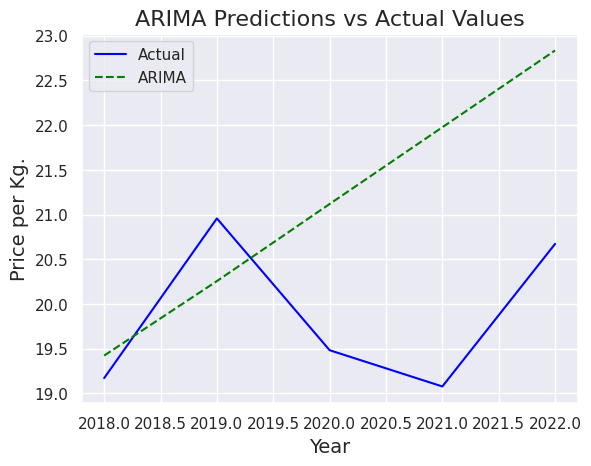

In [183]:
plt.plot(test['Year'], test['price_kg'], color='blue', linestyle='solid', label='Actual')
plt.plot(test['Year'], preds_arima, color='green', linestyle='dashed', label='ARIMA')
plt.title('ARIMA Predictions vs Actual Values', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price per Kg.', fontsize=14)
plt.legend()
plt.grid(True)
plt.rcParams['axes.facecolor'] = '#F2F2F2'
plt.show()


# SARIMA

In [181]:
# Fit a SARIMA(1,1,1)(1,1,1,12) model to the training data
model = SARIMAX(train['price_kg'], order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()

# Make predictions for the test data
preds_sarima = results.forecast(steps=len(test))

# Print the predicted values
print(preds_sarima)


10    18.375090
11    18.375090
12    23.747564
13    25.183846
14    26.150287
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



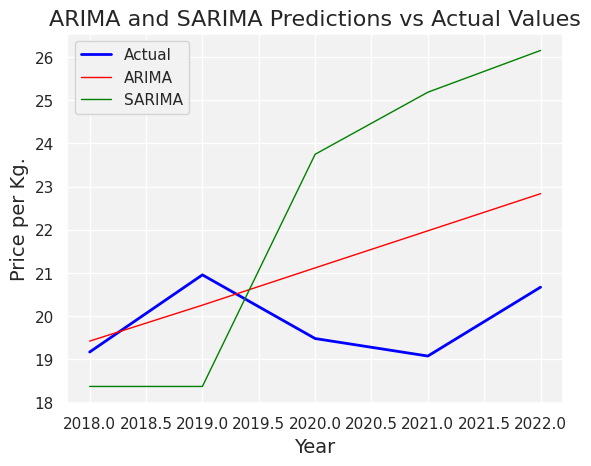

In [184]:
plt.plot(test['Year'], test['price_kg'], color='blue', linewidth=2, label='Actual')
plt.plot(test['Year'], preds_arima, color='red', linewidth=1, label='ARIMA')
plt.plot(test['Year'], preds_sarima, color='green', linewidth=1, label='SARIMA')
plt.title('ARIMA and SARIMA Predictions vs Actual Values', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price per Kg.', fontsize=14)
plt.legend()
plt.grid(True)
plt.rcParams['axes.facecolor'] = '#F2F2F2'
plt.show()


## Through The time series model If we take Year 2022:
# Actual Wheat Price per kg: ~ 20.8 Rs
# ARIMA Wheat Price per kg : ~ 23. Rs
# SARIMA Wheat Price per kg : ~ 26 Rs